In [1]:
import numpy as np
import cv2

# image path
path = ""
fileName = "000001_0.png"

# Reading an image in default mode:
inputImage = cv2.imread(path + fileName)

# Convert the image to HSV:
frame_hsv = cv2.cvtColor(inputImage, cv2.COLOR_BGR2HSV)

# Prepare a dictionary to store the lower and upper
# HSV thresholds:
rangeDictionary = {}

# brown color
lower_values = np.array([6, 63, 0])
upper_values = np.array([23, 255, 81])

# push it into the dictionary:
rangeDictionary[0] = (lower_values, upper_values, "brown")

# gray color
lower_values = np.array([23, 0, 0])
upper_values = np.array([80, 105, 107])

# push it into the dictionary:
rangeDictionary[1] = (lower_values, upper_values, "gray")

# white color
lower_values = np.array([37, 0, 131])
upper_values = np.array([170, 25, 152])

# push it into the dictionary:
rangeDictionary[2] = (lower_values, upper_values, "white")

# Store results here:
targetRectangles = []

In [68]:
def areaFilter(minArea, inputImage):

    # Perform an area filter on the binary blobs:
    componentsNumber, labeledImage, componentStats, componentCentroids = \
    cv2.connectedComponentsWithStats(inputImage, connectivity=4)

    # Get the indices/labels of the remaining components based on the area stat
    # (skip the background component at index 0)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

    # Filter the labeled pixels based on the remaining labels,
    # assign pixel intensity to 255 (uint8) for the remaining pixels
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

    return filteredImage

In [69]:
for i in rangeDictionary:

    # Get current lower and upper range values:
    current_LowRange = rangeDictionary[i][0]
    current_UppRange = rangeDictionary[i][1]

    # Create the HSV mask
    mask = cv2.inRange(frame_hsv, current_LowRange, current_UppRange)

    # Run a minimum area filter:
    minArea = 800
    mask = areaFilter(minArea, mask)

     # Pre-process mask:
    kernelSize = 3

    structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
    iterations = 10

    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, structuringElement, None, None, iterations, cv2.BORDER_REFLECT101)
    mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, structuringElement, None, None, iterations, cv2.BORDER_REFLECT101)

In [70]:
# Find the big contours/blobs on the filtered image:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# List to store all the bounding rectangles:
contours_poly = [None] * len(contours)
boundRect = []

# Alright, just look for the outer bounding boxes:
for b, c in enumerate(contours):

    if hierarchy[0][b][3] == -1:

        # Approximate the contour to a polygon:
        contours_poly = cv2.approxPolyDP(c, 3, True)
        # Convert the polygon to a bounding rectangle:
        boundRect = cv2.boundingRect(contours_poly)

# Get the dimensions of the bounding rect:
        rectX = boundRect[0]
        rectY = boundRect[1]
        rectWidth = boundRect[2]
        rectHeight = boundRect[3]

        rectArea = rectWidth * rectHeight

        # Calculate the aspect ratio:
        aspectRatio = rectWidth / rectHeight
        delta = abs(1.0 - aspectRatio)

        # Set the min threshold values to identify the
        # blob of interest:
        minArea = 2000 # 1000
        epsilon = 0.2

        # Is this bounding rectangle one the one we
        # are looking for?
        if rectArea > minArea and delta < epsilon:

            # Set a color:
            color = (0, 255, 0)
            inputCopy = inputImage.copy()

            # Draw the current rectangle on a copy of the BGR input:
            cv2.rectangle(inputCopy, (int(rectX), int(rectY)),
                            (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)
            # Store this bounding rectangle:
            targetRectangles.append(boundRect)


            # Label the current mask:
            currentColor = rangeDictionary[i][2]

            org = (rectX, rectY -10)
            font = cv2.FONT_HERSHEY_SIMPLEX
            color = (255, 0, 0)
            cv2.putText(inputCopy, currentColor, org, font,
                        0.5, color, 1, cv2.LINE_AA)

            cv2.imwrite(path + "colorMask_"+currentColor+".png", inputCopy)

In [6]:
list = []
for jpgfile in glob.iglob(os.path.join('test_direct', "*.jpg")):
    list.append(jpgfile)

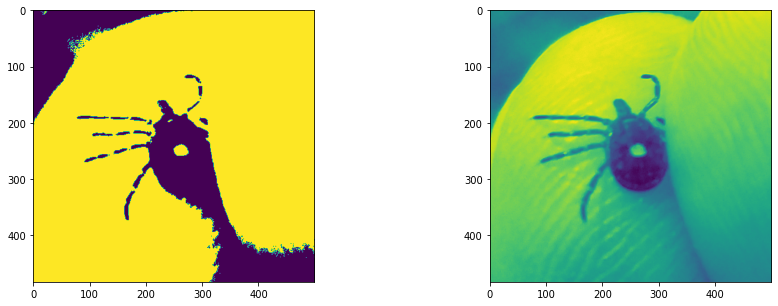

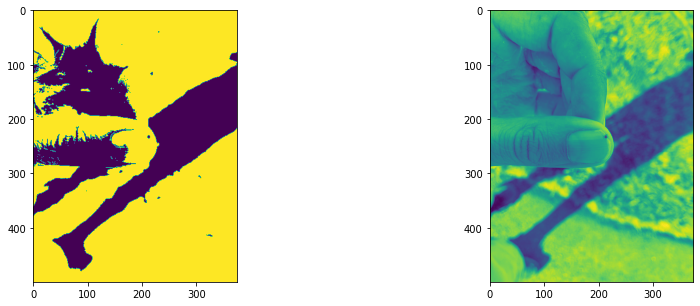

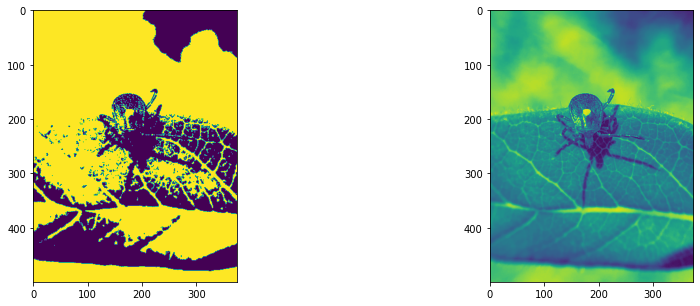

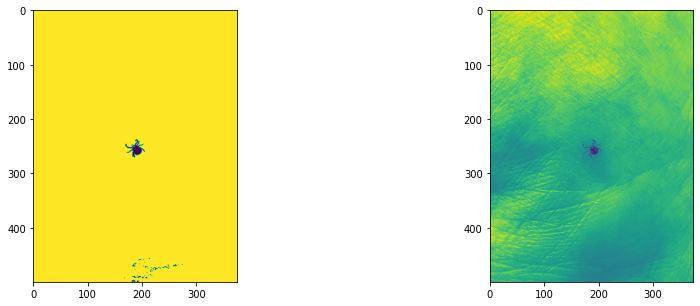

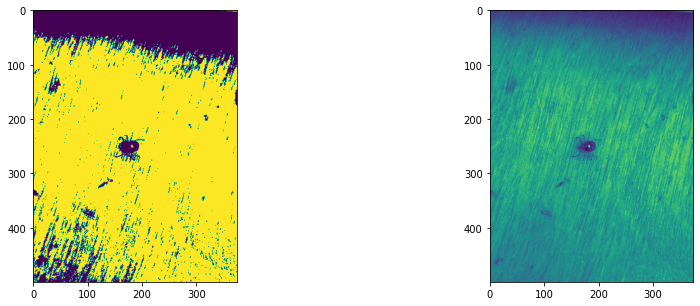

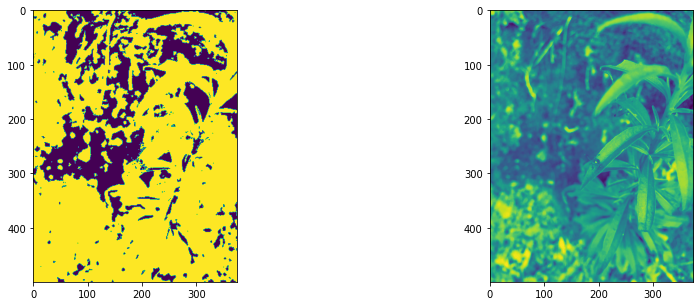

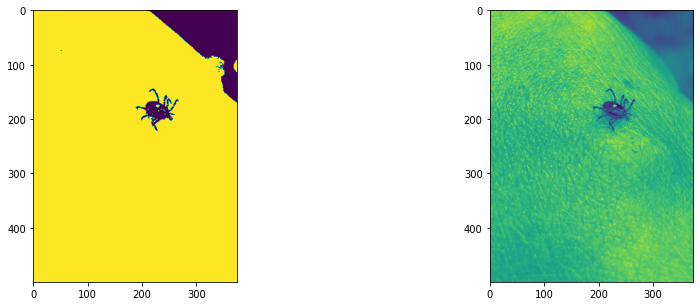

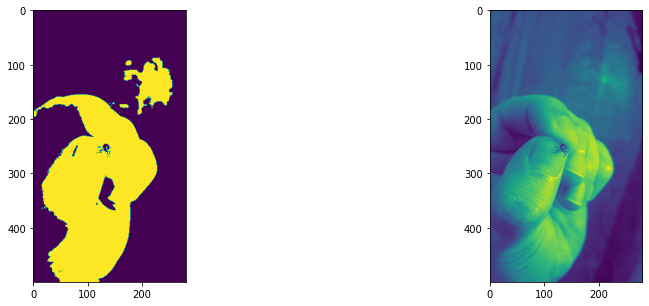

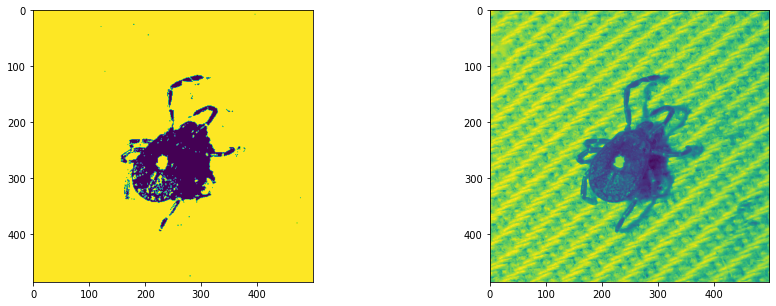

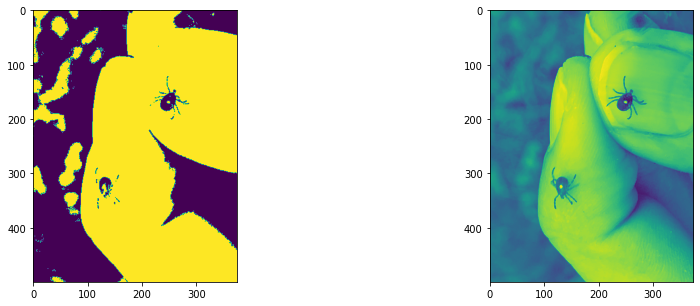

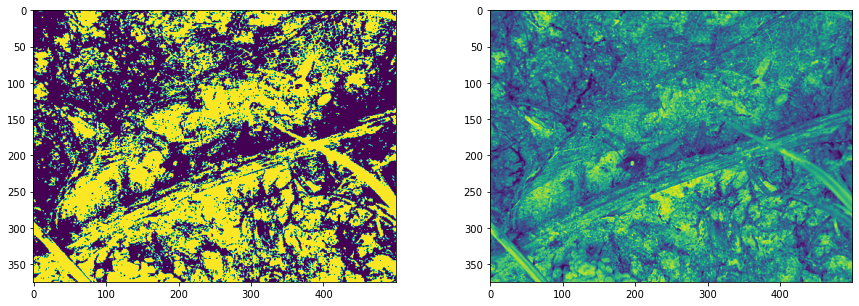

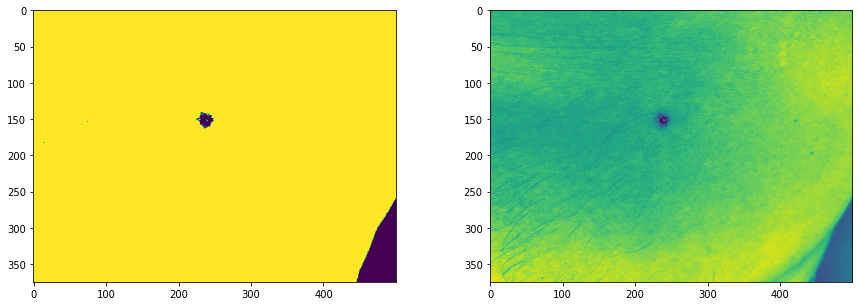

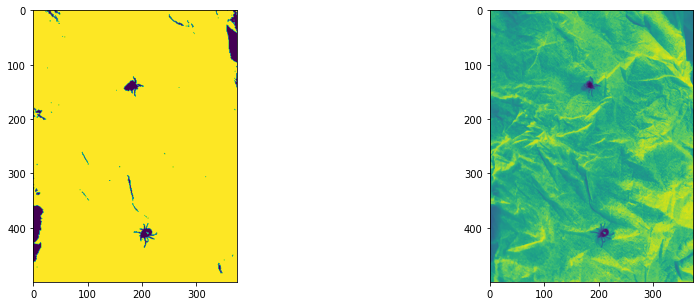

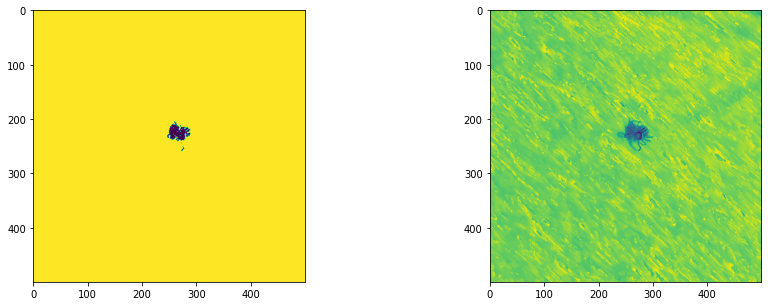

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob

for file in list: 
    img = cv.imread(file,0)
    ret2,th2 = cv.threshold(img,115,255,cv.THRESH_BINARY)
    # plt.subplot(3,3,4), plt.imshow(th2, 'gray')
    # plt.subplot(3,3,5), plt.imshow(th2, 'gray')

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].imshow(th2)
    ax[1].imshow(img)
    plt.show()


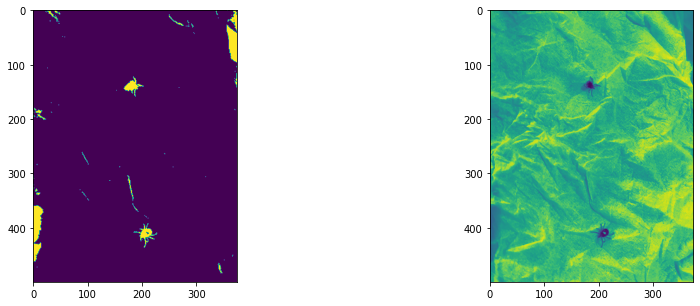

In [49]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('test_direct/78761820.jpg', cv.IMREAD_GRAYSCALE)
ret2,th2 = cv.threshold(img,115,255,cv.THRESH_BINARY_INV) # THRESH_BINARY_INV 
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(th2)
ax[1].imshow(img)
plt.show()

In [90]:
contours,hierarchy = cv2.findContours(th2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.countNonZero(th2)


3960

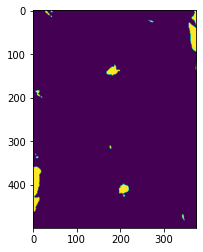

In [97]:
blur = cv2.medianBlur(th2,5)
cv2.countNonZero(blur)
imgplot = plt.imshow(blur)
plt.show()

In [16]:
import cv2
def areaFilter(minArea, inputImage):

    # Perform an area filter on the binary blobs:
    componentsNumber, labeledImage, componentStats, componentCentroids = \
    cv2.connectedComponentsWithStats(inputImage, connectivity=4)

    # Get the indices/labels of the remaining components based on the area stat
    # (skip the background component at index 0)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

    # Filter the labeled pixels based on the remaining labels,
    # assign pixel intensity to 255 (uint8) for the remaining pixels
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

    return filteredImage

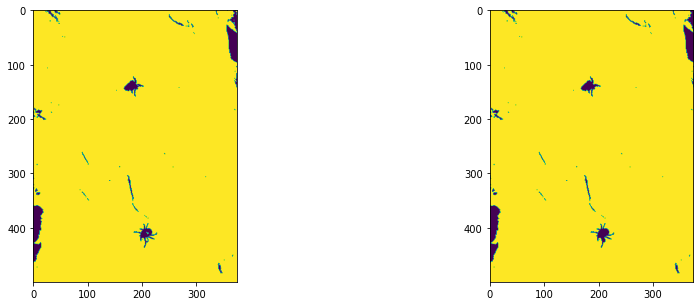

In [42]:
minArea = 150000
maks = areaFilter(minArea, th2)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(th2)
ax[1].imshow(maks)
plt.show()


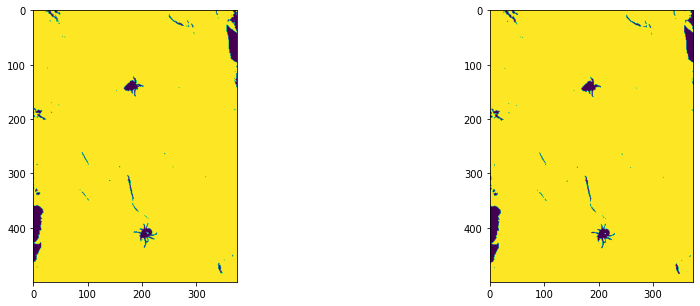

In [77]:
import numpy as np
import cv2 as cv
# img = cv.imread('test_direct/78595299.jpg')
kernel = np.ones((2,2),np.uint8)
erosion_1 = cv.erode(th2,kernel,iterations = 1)
dilation = cv2.dilate(erosion_1,kernel,iterations = 1)
fig1, ax1 = plt.subplots(1, 2, figsize=(15,5))
ax1[0].imshow(th2)
ax1[1].imshow(dilation)
plt.show()


In [35]:
coords = np.column_stack(np.where(th2 == 0))
print(coords)

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [499 372]
 [499 373]
 [499 374]]


In [3]:
import cv2 as cv 
import cv2
import numpy as np
import scipy.signal

img = cv.imread('test_direct/78761820.jpg', cv.IMREAD_GRAYSCALE)
ret2,th2 = cv.threshold(img,115,255,cv.THRESH_BINARY_INV)

# find connected components (blobs) on binary mask 
nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(th2, connectivity=8)

# delete smaller clusters that are less than 30 pixels in both height and width
for i in range(nlabel):
    if (stats[i, cv2.CC_STAT_WIDTH] <= 30) and (stats[i, cv2.CC_STAT_HEIGHT] <= 30):
        th2[labels == i] = 0

'''
# mask = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, np.ones((1, 150)))

# nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

# for i in range(nlabel):
#     if (stats[i, cv2.CC_STAT_WIDTH] <= 30) and (stats[i, cv2.CC_STAT_HEIGHT] <= 30):
#         th2[labels == i] = 0

# th2 = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, np.ones((1, 15)))
# th2 = scipy.signal.medfilt(th2, (3,5))
'''

# blur 
blur = cv2.medianBlur(th2,5)

# find remaining connected components
nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(th2, connectivity=8)

# find the coords of all black pixels
coords = np.column_stack(np.where(th2 == 0))


# check each connected component for tick-like features
for i in range(nlabel):
    x, y = centroids[i][0], centroids[i][1]
    print(x,y)
    # for coord in coords:
    #     if x + y == coord[0] + coord[1]:
    #         print("blob" + i)
         
    # check if within a certain radius around centriod if pixels are plack

# cv2.imshow('thresh', th2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

187.10891556844282 249.45308181428206
369.97520661157023 16.636363636363637
366.4739281575898 60.8539976825029
182.25943396226415 139.70518867924528
178.70103092783506 324.4845360824742
6.283426741393114 403.2097678142514
207.05603448275863 411.3340517241379


In [9]:
imagem = cv2.bitwise_not(th2)

In [24]:
params = cv2.SimpleBlobDetector_Params()


params.filterByArea = True
params.minArea = 1 
# params.maxArea = 100000

# params.filterByCircularity = True
# params.minCircularity = 0.9

# params.filterByConvexity = True
# params.minConvexity = 0.2

# params.filterByInertia = True
# params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(imagem)

blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(imagem, keypoints, blank, (0, 0, 255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


cv2.imshow("Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

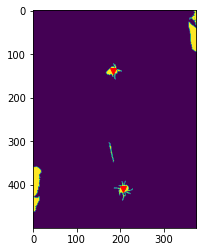

In [64]:
imgplot = plt.imshow(th2)
plt.plot(182.25943396226415, 139.70518867924528, marker='v', color="red")
plt.plot(207.05603448275863, 411.3340517241379, marker='v', color="red")
plt.show()

In [27]:
import os
import glob
for jpgfile in glob.iglob(os.path.join('test_direct', "*.jpg")):
    img = cv.imread(jpgfile, cv.IMREAD_GRAYSCALE)
    ret2,th2 = cv.threshold(img,115,255,cv.THRESH_BINARY_INV)
    
    # find connected components (blobs) on binary mask 
    nlabel, labels, stats, centroids = cv2.connectedComponentsWithStats(th2, connectivity=8)

    # delete smaller clusters that are less than 30 pixels in both height and width
    for i in range(nlabel):
        if (stats[i, cv2.CC_STAT_WIDTH] <= 30) and (stats[i, cv2.CC_STAT_HEIGHT] <= 30):
            th2[labels == i] = 0

    cv2.imshow('thresh', th2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    


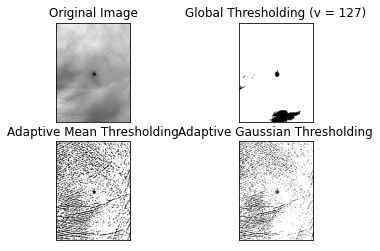

: 

In [35]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('test_direct/78781177.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
th4 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()